# Linear Regression

**Regression models** (both linear & non-linear) are used for predicting a real value, like a price of a house.
   * Any kind of continuous numerical value. 

If independent variable is time, then we will be forecasting the future values; or else the model is predicting present but unknown values.

There are total of 2 types of **Linear Regression**:
1. Simple Linear Regression
2. Multiple Linear Regression
    * Provides prediction for **linear datasets**.

### Assumptions of Linear Regression

We have to make sure our data fits the linear regression, and not blindly applying it.
<img src='../../resources/linear regression/linear regression/anscombes quartet.png' />

Assumptions required:
<img src='../../resources/linear regression/linear regression/assumptions.png' />

### Statistical Significance

**Hypothesis Testing**
   * For a coin toss example:
       * H0 - A fair coin (null hypothesis, original assumption)
       * H1 - Not a fair coin (alternative hypothesis)
           * We need to find out which hypothesis is correct.
           * We first assume H0 (null hypothesis) is true
           * We want a head but get a tail, ok as probability = 0.5.
           * tail again, ok as probability = 0.25
           * tail again, ok as probability = 0.12
           * tail again, suspicious but ok, probability = 0.06
           * tail again, suspicious, probability = 0.03 (If H0 is true, we only see this 3%)
           * tail again, suspicious, probability = 0.01 (This feeling is statistic significance, at 0.05)
           > **When <= 5%, we can reject null hypothesis (H0)**
           
           * P-Value is dropping, probability is dropping
           
           * **Note:** If H1 is our assumption, then P-Value will be high, all 100%.
           * **We are 95% confident that H1 is true**

## Simple Linear Regression

Equation

1. Dependent Variable(y): value we are trying to predict
2. Independent Variable(X1): the predictor
3. y-intercept(b0): a constant value
4. Slope Coefficient(b1)

<img src='../../resources/linear regression/linear regression/simple_linear_regression_formula.png' />

**y-intercept**
* The point where the line crosses the y-axis (when X=0)

**slope coefficient**
* The slope = if fertilizer increases by 1kg, the potato yield increases by 3t

<img src='../../resources/linear regression/linear regression/formula intuition.png' />

### Ordinary Lease Squares

With the dataset given, we want to find a **best line** across all data points (in order to be the best fit of all data).

To do so:

<img src='../../resources/linear regression/linear regression/ordinary_least_squares.png' />

In the above example:
* To find the best line of best fit, we need to first consider the:
    1. yi = the **actual** value of y
    2. yi^ = the predicted value of y by the line of best fit
    
    * To find the best fit, we want to sum up all of the **square of the residual**.
        * The smallest value = Best regression line (Line of best fit)
        * Residual = difference between yi & yi^

<hr/>

### Importing the libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

This dataset has a clear linear relationship, so linear regression is ok.

In [118]:
df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [17]:
X = df.drop('Salary', axis=1)
y = df['Salary']

# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

# We can use '.values' to get numpy array

In [19]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


### Splitting dataset

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

### Training the Simple Linear Regression model

In [25]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set result

In [28]:
y_preds = regressor.predict(X_test)

### Visualizing the training set result

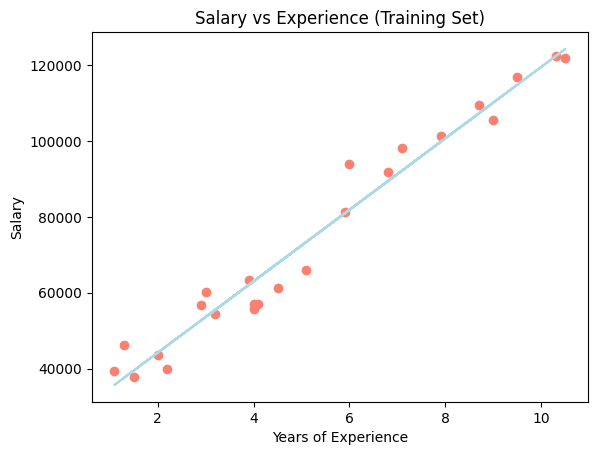

In [43]:
plt.scatter(X_train, y_train, color='salmon')
plt.plot(X_train, regressor.predict(X_train), color='lightblue'); # Plotting the line of best fit using the predicted result
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary');

### Visualizing the test set result

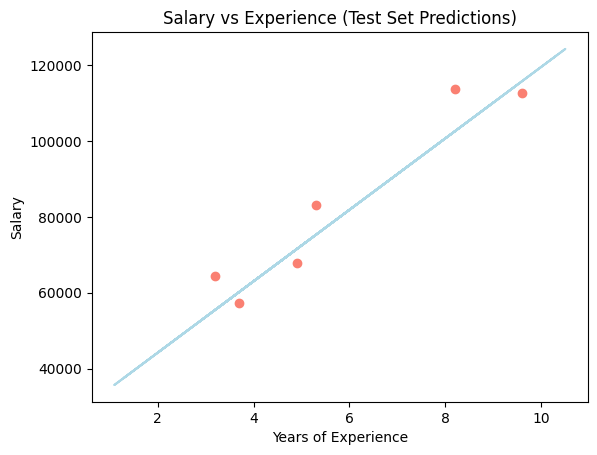

In [45]:
plt.scatter(X_test, y_test, color='salmon')
# Predicted salary will be on the SAME regression line, as we train the model using the training set
plt.plot(X_train, regressor.predict(X_train), color='lightblue')
plt.title('Salary vs Experience (Test Set Predictions)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary');

## Multiple Linear Regression

Similar to simple linear regression, but there are multiple features (X variables), and they all together determine the dependent variable (y, the variable we want to predict).

Equation:

<img src='../../resources/linear regression/linear regression/multiple_linear_regression_formula.png' />

In [120]:
df = pd.read_csv('data/50_startups.csv')
df.head()

# Profit is the dependent variable (y)
# All the rest are the independent variables (features, X)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


For the state, it is a categorical variable.

To include it, we need to encode it.

**Note**: Never include all of the dummy variables
   * They work like a light switch as:
       * They are directly correlated, when one is 0, the other one has to be 1.
       * This is duplicating variable -> D2 = 1 - D1
       * Therefore, the formula is the same.
   * Always **omit 1 dummy variable**: if 8 inlcudes only 7

<img src='../../resources/linear regression/linear regression/dummy_variables.png' />

### Eliminating unnecessary columns

We need to select out of all features, which to include as:
1. Garbage into model, it will not a good model.
2. Explanation of the model with how feature correlated to the predictions.

**5 Ways to build models**
1. All in
2. Backward Elimination
3. Forward Selection
4. Bidirectional Elimination
5. Score Comparison

* **All in**
    * Prior Knowledge
    * Have to use
    * Preparing for Backward Elimination
    
 
* **Backward Elimination**
    1. Select a significance level to stay in the model (eg. SL = 0.05)
    2. Fit the full model with all possible predictors.
    3. Consider the predictor with the **highest** P-value. 
        * If P > SL, go to Step 4, otherwise go to FIN (Model is ready).
    4. Remove the predictor (the one with highest P-value).
    5. Fit the model without this variable.
        * Back to step 3
    6. Until the point with even variable has highest P-value, but still less than SL.
    
 
* **Forward Selection**
    1. Select a significance level to enter the model (eg. SL = 0.05)
    2. Fit all simple linear regression models y ~ xn.
        * Select the one with lowest P-value
    3. Keep this variable and fit all possible models with one extra predictor added to the one(s) we already have.
        * Basically, we add on the next variable.
    4. Consider the predictor wwith **lowest** P-value.
        * If P < SL, go to step 3, otherwise go to FIN.
        * If P > SL, this means the variable is **NO LONGER SIGNIFICANT**, so it is finished & keep previous.
        
        
* **Bidirectional Elimination**
    1. Select a significance level to enter and to stay in the model.
        * eg: SLEnter = 0.05, SLStay = 0.05
    2. Perform the next step of Forward Selection.
        * New variables must have: P < SLEnter to enter)
    3. Perform all steps of Backward Elimination.
        * Old variables must have: P < SLStay to stay
        * Back to Step 2
    4. No new varaibles can enter & no old variables can exit - Finished
    

* **All Possible Models**
    * Requires most resources.
    * Example: 10 columns = 1023 models
    
    1. Select a criterion off goodness of fit (eg. Akaike criterion)
    2. Construct ALL Possible Regression Models: (2^N - 1) total combinations
    3. Select the one with best criterion
    4. Model is ready

### Preparing Dataset

In [121]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [122]:
X = df.drop('Profit', axis=1).values
y = df['Profit'].values

### Encoding Categorical Data

In [123]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', 
                                      OneHotEncoder(),
                                      [3])], # if DF then ['State']
                       remainder='passthrough')

X = np.array(ct.fit_transform(X))
print(X[:10])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]]


### Splitting the dataset

In [124]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Note:** We don't have to apply feature scaling, as linear regression has a coefficient that is multiplied to each of the feature as they will compensate.

**Note:** `Scikit-Learn` automatically eliminates dummy variable trap.

**Note:** Backward Elimination steps are not needed. `Scikit-Learn` has completed for us.

### Training the model

In [125]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test Set result

In [126]:
y_preds = regressor.predict(X_test)

np.set_printoptions(precision=2) # 2 decimals

# Concatenate 2 vectors together to compare
print(np.concatenate((y_preds.reshape(len(y_preds), 1),
                      y_test.reshape(len(y_test), 1)),
                     axis=1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [127]:
y_preds

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [128]:
regressor.score(X_test, y_test)

0.934706847328201